<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/ADS_P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Libraries**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

## **2. Load Dataset**

Data Loading dengan try-except (untuk robustnes):
Jika kagglehub tidak tersedia atau gagal, Kita bisa menyediakan path alternatif.

In [2]:
try:
  path = kagglehub.dataset_download("mirichoi0218/insurance")
  csv_file_path = f'{path}/insurance.csv'
  print(f'Dataset loaded from Kaggle Hub: {csv_file_path}')
except Exception as e:
  print(f'Failed to load from Kaggle Hub: {e}')
  csv_file_path = 'insurance.csv'
  print(f'Attempting to load from local path: {csv_file_path}')

100%|██████████| 16.0k/16.0k [00:00<00:00, 23.7MB/s]

Extracting files...
Dataset loaded from Kaggle Hub: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/insurance.csv


In [3]:
df = pd.read_csv(csv_file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## **3. Preprocessing (Penanganan Missing Value dan Duplikasi Data)**

### **a. Cek Duplikasi Data**

In [4]:
df.duplicated().sum()

np.int64(1)

Terdapat 1 baris data yang duplikat, maka kita bisa menghapus baris data yang duplikat itu.

In [5]:
df.drop_duplicates(inplace=True)

Marimkita cek ulang untuk memastikan bahwa sudah tidak ada lagi data yang duplikat.

In [7]:
print(f'Jumlah data yang duplikat: {df.duplicated().sum()}')

Jumlah data yang duplikat: 0


### **b. Cek Missing Value**

In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Setiap kolom menampilkan angka **0**:
Artinya tidak ada missing value di seluruh kolom (`age`, `sex`, `bmi`, dll.).

Mengapa harus mengecek missing value pada data ini?

**1. Modeling/Regresi**

- Algoritma machine learning seperti Linear Regression tidak bisa bekerja dengan missing value.

- Jika ada NaN, perlu di-handle sebelum training model.

**2. Analisis Statistik**

- Missing value dapat mengganggu perhitungan mean, median, atau korelasi.

## **4. Exploratory Data Analysis (EDA)**


### **a. Deskripsi/Ringkasan Data**

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### **b. Informasi Data(kolom)**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### **c. Distribusi Variabel Kategorik**


Distribusi variabel kategorik:

--- sex ---
sex
male      50.486163
female    49.513837
Name: proportion, dtype: float64


<ipython-input-12-25baba5d9d8f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


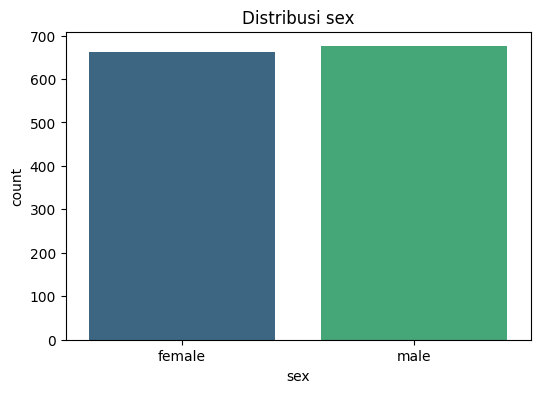


--- smoker ---
smoker
no     79.506358
yes    20.493642
Name: proportion, dtype: float64


<ipython-input-12-25baba5d9d8f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


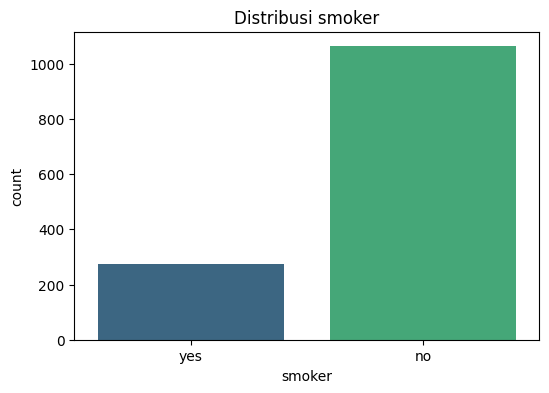


--- region ---
region
southeast    27.225131
southwest    24.308153
northwest    24.233358
northeast    24.233358
Name: proportion, dtype: float64


<ipython-input-12-25baba5d9d8f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


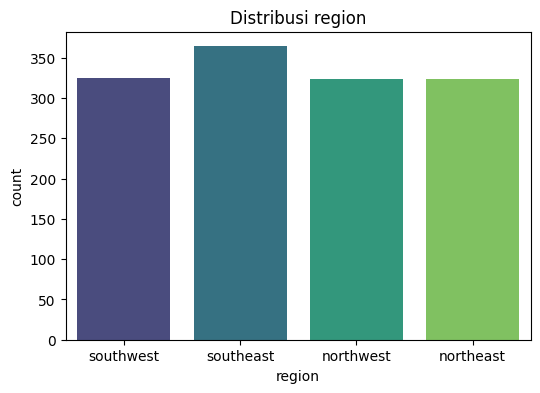


--- children ---
children
0    42.857143
1    24.233358
2    17.950636
3    11.742708
4     1.869858
5     1.346298
Name: proportion, dtype: float64


<ipython-input-12-25baba5d9d8f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


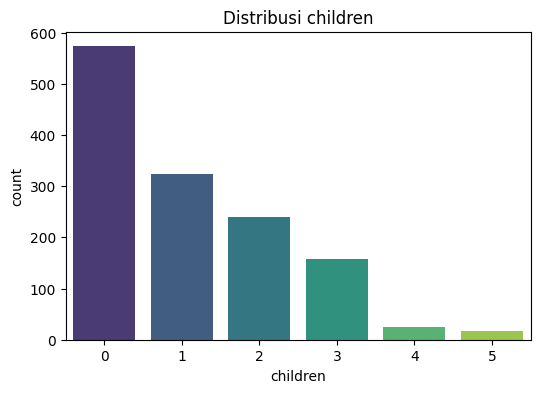

In [12]:
print("\nDistribusi variabel kategorik:")
for col in ['sex', 'smoker', 'region', 'children']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True) * 100)
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.show()

### **d. Hubungan Variabel Kategorik dengan Target (charges)**

<ipython-input-13-83686bb5c33e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=df, palette='pastel')


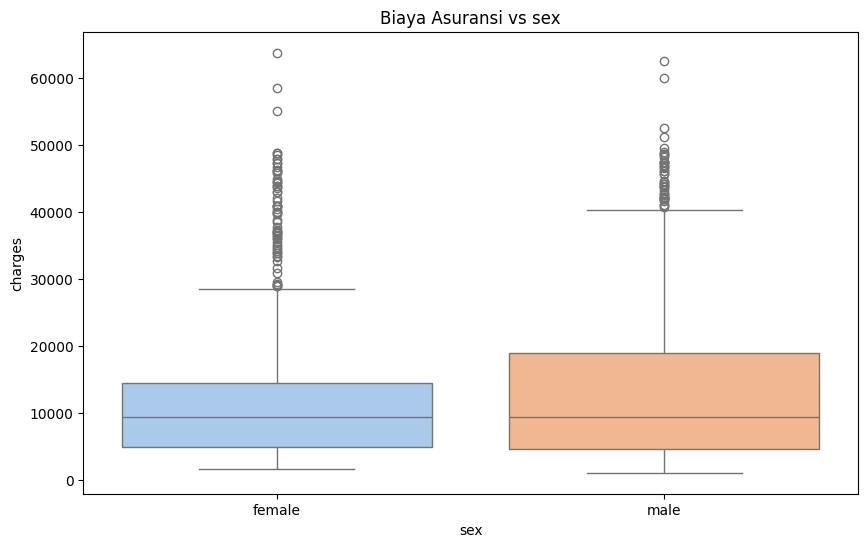

<ipython-input-13-83686bb5c33e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=df, palette='pastel')


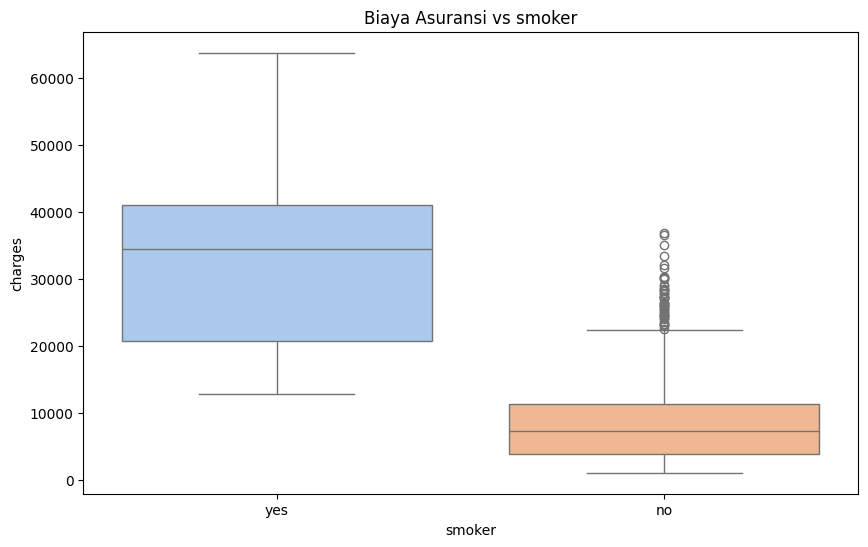

<ipython-input-13-83686bb5c33e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=df, palette='pastel')


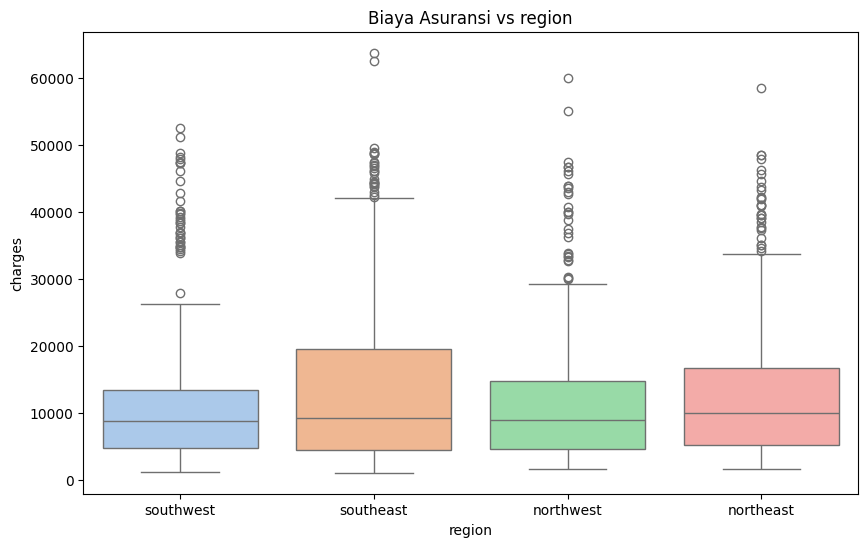

<ipython-input-13-83686bb5c33e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=df, palette='pastel')


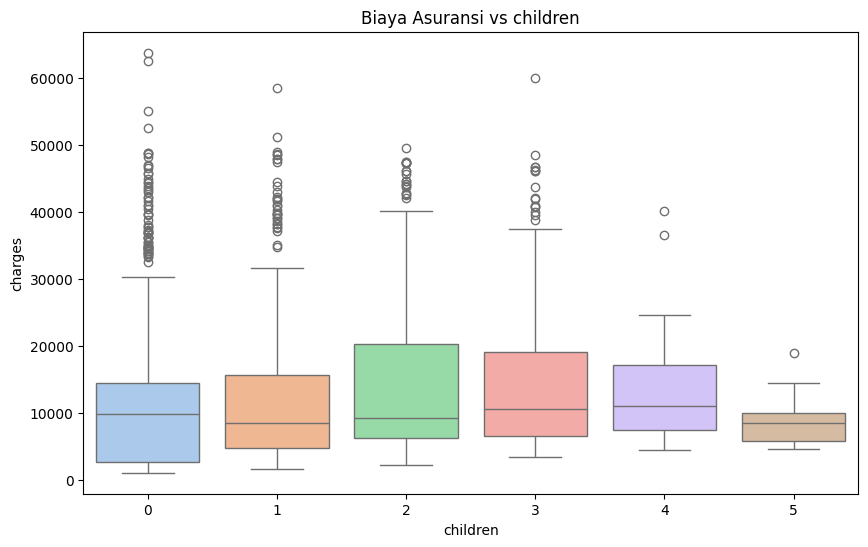

In [13]:
categorical_cols = ['sex', 'smoker', 'region', 'children']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='charges', data=df, palette='pastel')
    plt.title(f'Biaya Asuransi vs {col}')
    plt.show()

### **e. Distribusi Variabel Numerik**


=== Distribusi Biaya Asuransi ===
Statistik deskriptif charges:
count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


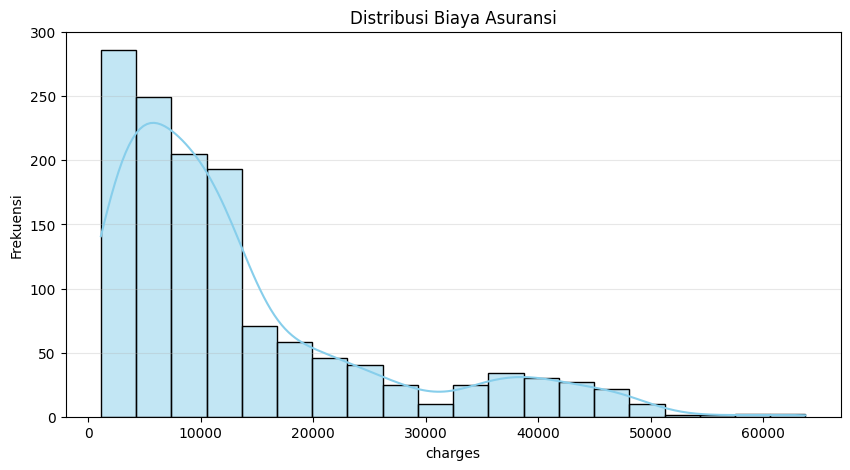

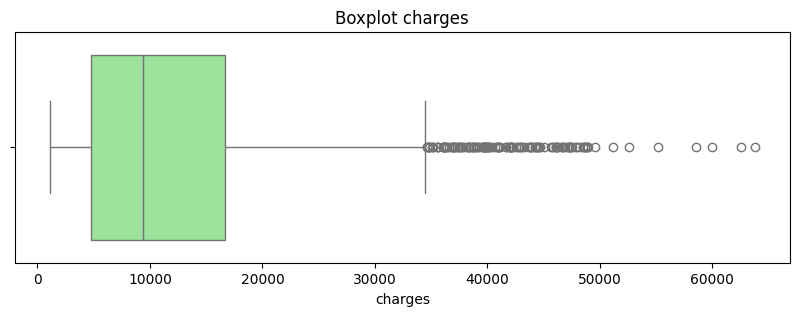


=== Distribusi Body Mass Index (BMI) ===
Statistik deskriptif bmi:
count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


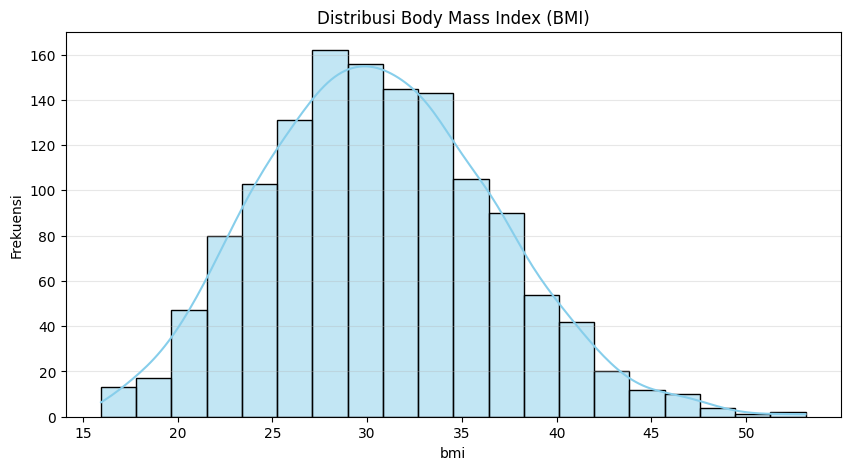

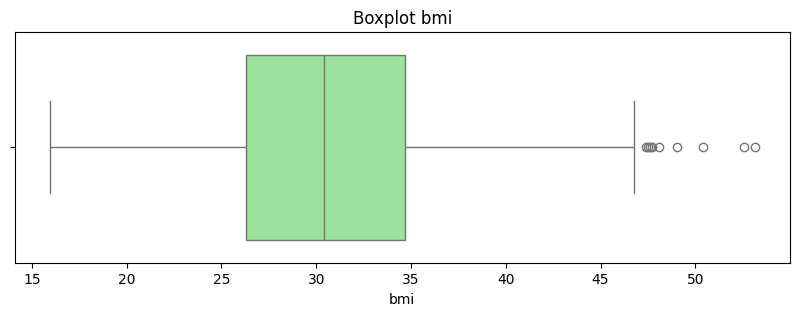


=== Distribusi Umur ===
Statistik deskriptif age:
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


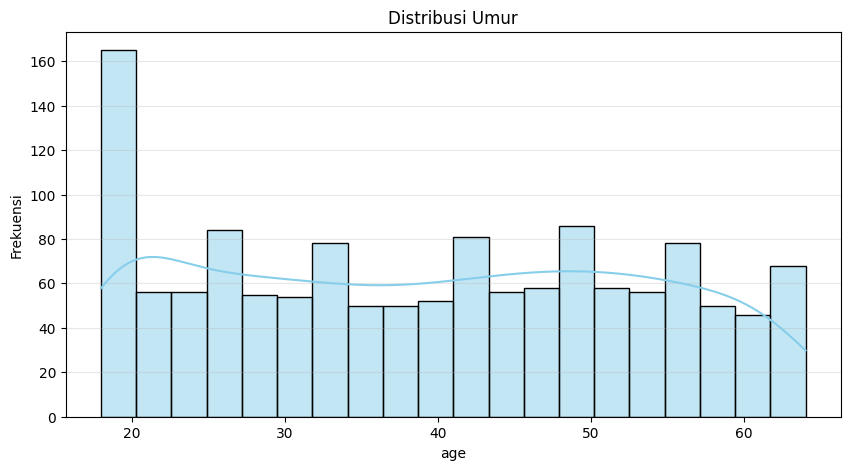

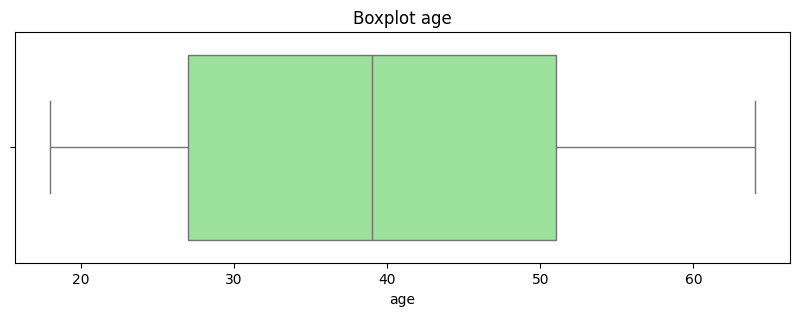

In [16]:
from IPython.display import display, HTML

# List kolom numerik dan judulnya
numerical_cols = ['charges', 'bmi', 'age']
titles = ['Distribusi Biaya Asuransi', 'Distribusi Body Mass Index (BMI)', 'Distribusi Umur']

# Membuat container untuk output scrollable
display(HTML("<div style='height: 400px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>"))

# Loop melalui setiap kolom numerik
for col, title in zip(numerical_cols, titles):
    print(f"\n=== {title} ===")
    print(f"Statistik deskriptif {col}:")
    print(df[col].describe())

    # Visualisasi
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # Boxplot tambahan untuk melihat outliers
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
    plt.show()

display(HTML("</div>"))

### **f. Hubungan Variabel Numerik dengan Target (charges)**

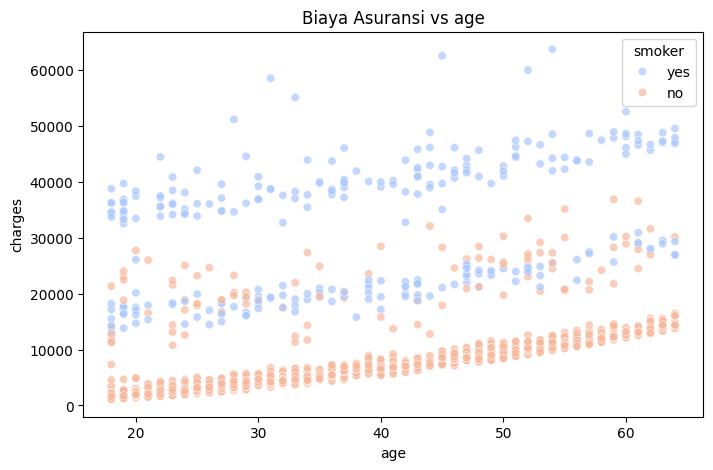

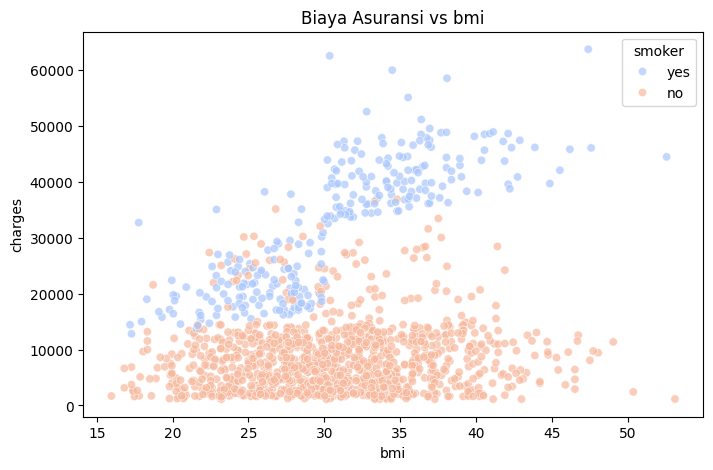

In [17]:
numerical_cols_for_scatter = ['age', 'bmi'] # children bisa dianggap kategorik/ordinal di sini
for col in numerical_cols_for_scatter:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y='charges', data=df, hue='smoker', palette='coolwarm', alpha=0.7)
    plt.title(f'Biaya Asuransi vs {col}')
    plt.show()

### **g. Outlier Detection (Opsional)**

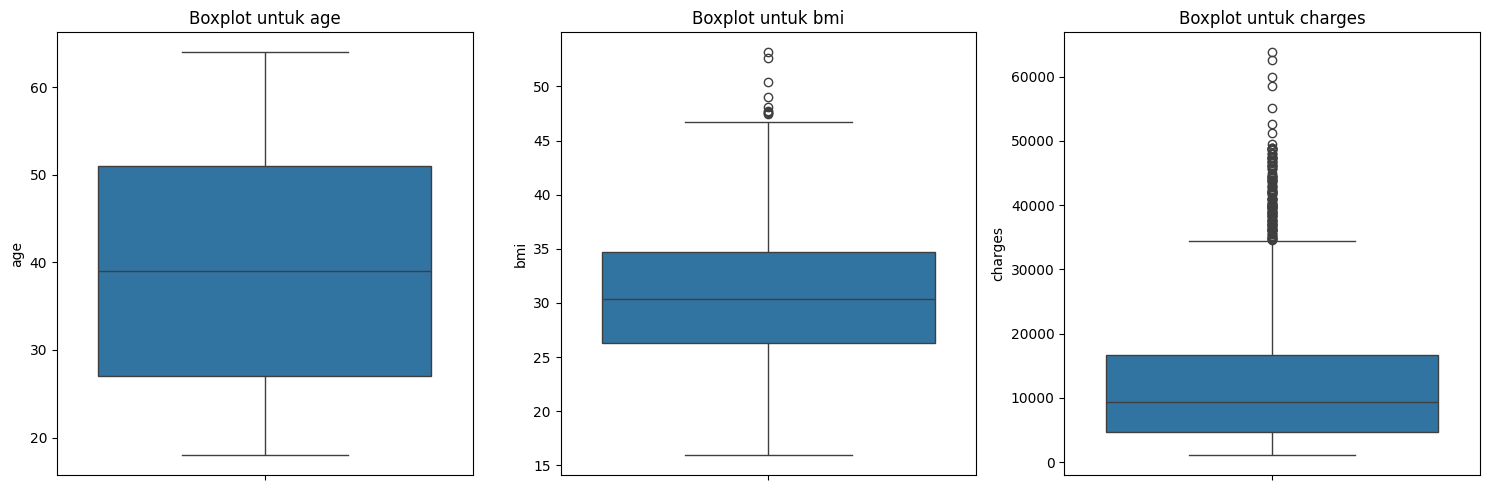

In [18]:
numerical_cols = ['age', 'bmi', 'charges']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot untuk {col}')
plt.tight_layout()
plt.show()

### **h. Analisis Korelasi Numerik**

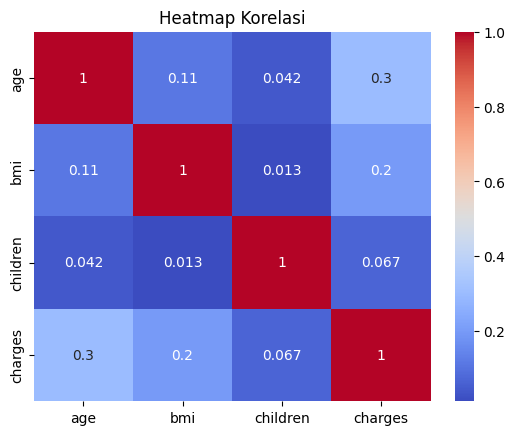

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

## **5. Preprocessing (Persiapan untuk model Regresi)**

### **a. Encoding variabel kategorik**

In [21]:
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'smoker', 'region'],
    drop_first=True  # Mengurangi dimensi dengan menghilangkan kolom pertama
)

### **b. Konfirmasi hasil encoding**

Kolom setelah encoding:

In [ ]:
df_encoded.columns


Kolom setelah encoding:
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [ ]:
print("\nDataFrame setelah encoding (5 baris pertama):")
print(df_encoded.head())

In [ ]:
print("\nInfo DataFrame setelah encoding:")
df_encoded.info() # MODIFIKASI: Cek Dtypes dan Non-Null

In [ ]:
# Langkah 6: Pisahkan fitur (X) dan target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [ ]:
# Langkah 7: Split data training-testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## **Pemodelan dan Simulasi**

In [ ]:
# Langkah 8: Inisialisasi dan training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Langkah 9: Prediksi data testing
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
print(f"\nR-squared: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):.2f}")


R-squared: 0.807
MAE: $4177.05


In [ ]:
# Tampilkan koefisien
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

In [ ]:
print("\nKoefisien Regresi:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Koefisien Regresi:
            Feature   Coefficient
4        smoker_yes  23077.764593
2          children    533.009989
1               bmi    318.701441
0               age    248.210720
3          sex_male   -101.542054
5  region_northwest   -391.761455
7  region_southwest   -659.139752
6  region_southeast   -838.919616


## **Interpretasi Hasil**

<ipython-input-36-3c363de86b3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


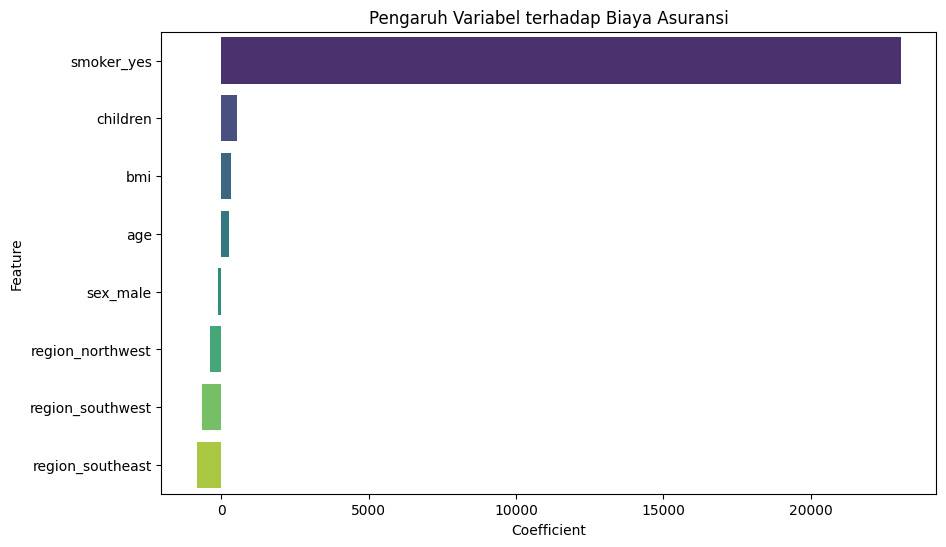

In [ ]:
# Visualisasi koefisien
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients.sort_values('Coefficient', ascending=False),
    palette='viridis'
)
plt.title('Pengaruh Variabel terhadap Biaya Asuransi')
plt.show()